# Logistic Regression

Iteration 0, Loss: 0.6931471805599453
Iteration 100, Loss: 0.3525260960681815
Iteration 200, Loss: 0.2983957826378415
Iteration 300, Loss: 0.2755651269507343
Iteration 400, Loss: 0.2629204275048618
Iteration 500, Loss: 0.2549302014250652
Iteration 600, Loss: 0.24946763406802558
Iteration 700, Loss: 0.24553161729100295
Iteration 800, Loss: 0.24258676811497845
Iteration 900, Loss: 0.24032024222987258


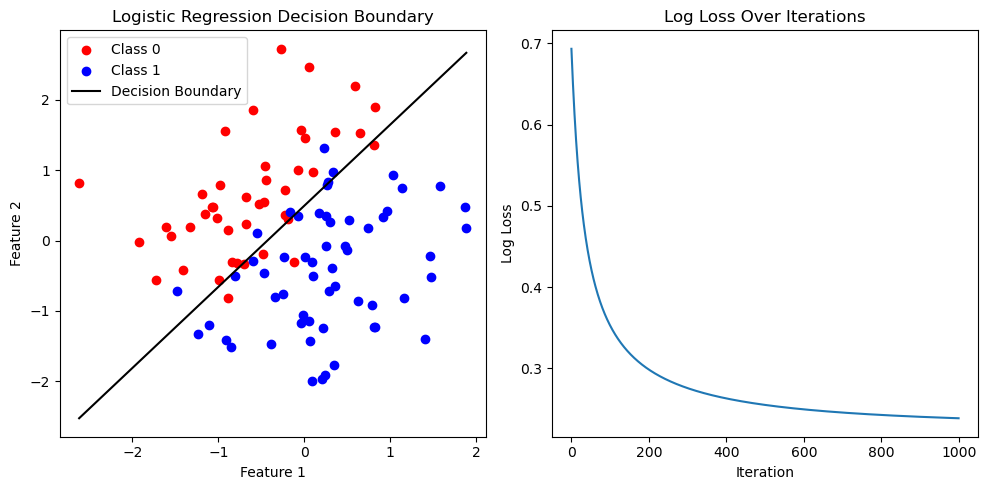

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
num_points = 100
X = np.hstack((np.ones((num_points, 1)), np.random.randn(num_points, 2)))  # Add bias term
true_weights = np.array([0.5, 1, -1])  # True weights for the synthetic data
y = (np.dot(X, true_weights) + np.random.randn(num_points) * 0.5 > 0).astype(int)  # Binary labels (0 or 1)

# Step 2: Define logistic function and log loss
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y_true, y_pred):
    epsilon = 1e-15  # To prevent log(0), mathematically we can cancel the term if y_true = 0 or (1 - y_true = 0) but not computationally
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Step 3: Gradient descent for logistic regression
def gradient_descent(X, y, learning_rate=0.1, num_iterations=1000):
    weights = np.zeros(X.shape[1])
    loss_history = []

    for i in range(num_iterations):
        # Forward pass
        predictions = sigmoid(np.dot(X, weights))

        # Compute gradient
        gradient = np.dot(X.T, predictions - y) / y.size

        # Update weights
        weights -= learning_rate * gradient

        # Log loss for tracking
        loss = log_loss(y, predictions)
        loss_history.append(loss)

        # Print loss every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss}")

    return weights, loss_history

# Train the logistic regression model
learning_rate = 0.1
num_iterations = 1000
weights, loss_history = gradient_descent(X, y, learning_rate, num_iterations)

# Step 4: Visualize results
# Plot decision boundary
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0], color='red', label='Class 0')
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1], color='blue', label='Class 1')
x_boundary = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
y_boundary = -(weights[0] + weights[1] * x_boundary) / weights[2]
plt.plot(x_boundary, y_boundary, 'k-', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Logistic Regression Decision Boundary")

# Plot log loss over iterations
plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Log Loss Over Iterations")

plt.tight_layout()
plt.show()


# Evaluations


Threshold: 0.3
Confusion Matrix:
 [[32 11]
 [ 2 55]]
Accuracy: 0.87
Precision: 0.83
Recall: 0.96
F1 Score: 0.89

Threshold: 0.5
Confusion Matrix:
 [[38  5]
 [ 6 51]]
Accuracy: 0.89
Precision: 0.91
Recall: 0.89
F1 Score: 0.90

Threshold: 0.7
Confusion Matrix:
 [[42  1]
 [10 47]]
Accuracy: 0.89
Precision: 0.98
Recall: 0.82
F1 Score: 0.90


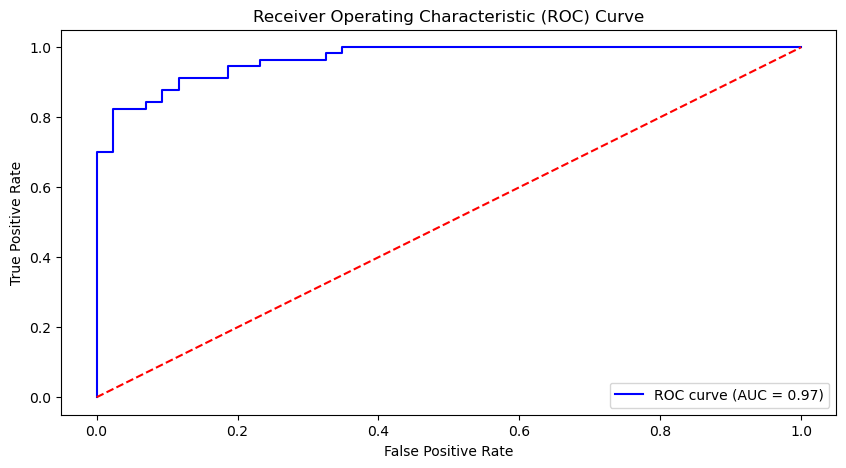

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Step 1: Predict probabilities for the test data
y_prob = sigmoid(np.dot(X, weights))

# Step 2: Define a function to calculate metrics with different thresholds
def evaluate_model(y_true, y_prob, threshold=0.5):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_prob >= threshold).astype(int)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return conf_matrix, accuracy, precision, recall, f1

# Step 3: Experiment with different thresholds
thresholds = [0.3, 0.5, 0.7]
for threshold in thresholds:
    conf_matrix, accuracy, precision, recall, f1 = evaluate_model(y, y_prob, threshold)
    print(f"\nThreshold: {threshold}")
    print("Confusion Matrix:\n", conf_matrix)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

# Step 4: Plot ROC curve and calculate AUC
fpr, tpr, thresholds_roc = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))

# Plot ROC Curve
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Logistic regression with scikitlearn

Log Loss: 0.27080770718011377


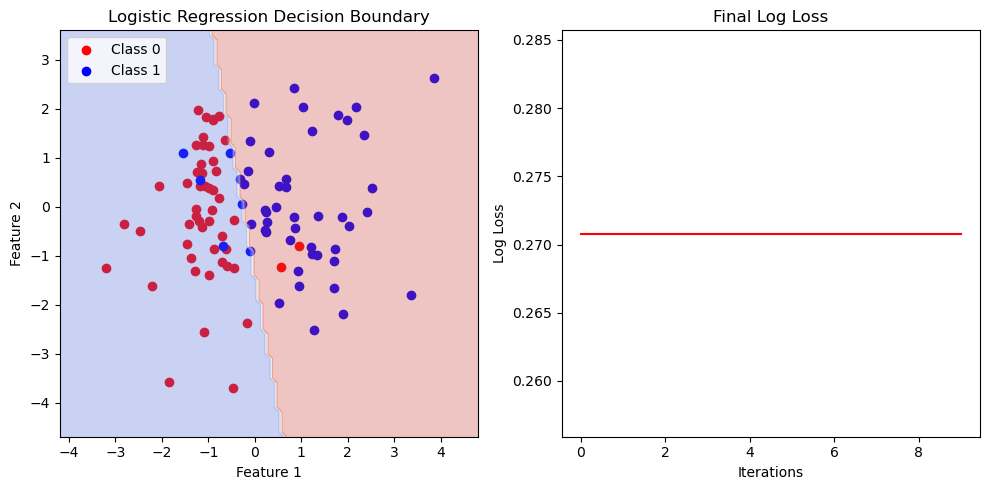

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=0)

# Step 2: Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predictions and log loss calculation
y_prob = model.predict_proba(X)[:, 1]  # Probability of the positive class
loss = log_loss(y, y_prob)

# Print log loss
print(f"Log Loss: {loss}")

# Step 3: Visualize results
# Plot decision boundary
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

# Scatter plot for the data points
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], color='red', label='Class 0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], color='blue', label='Class 1')

# # Create a grid to evaluate the model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Logistic Regression Decision Boundary")

# Plot log loss over iterations
# Note: Sklearn does not provide access to each iteration's log loss, so we only display the final loss
plt.subplot(1, 2, 2)
plt.plot([loss] * 10, 'r-')  # Simple line to represent final loss for illustration
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Final Log Loss")

plt.tight_layout()
plt.show()

# Multi-class classification

Log Loss: 0.21542492343412883


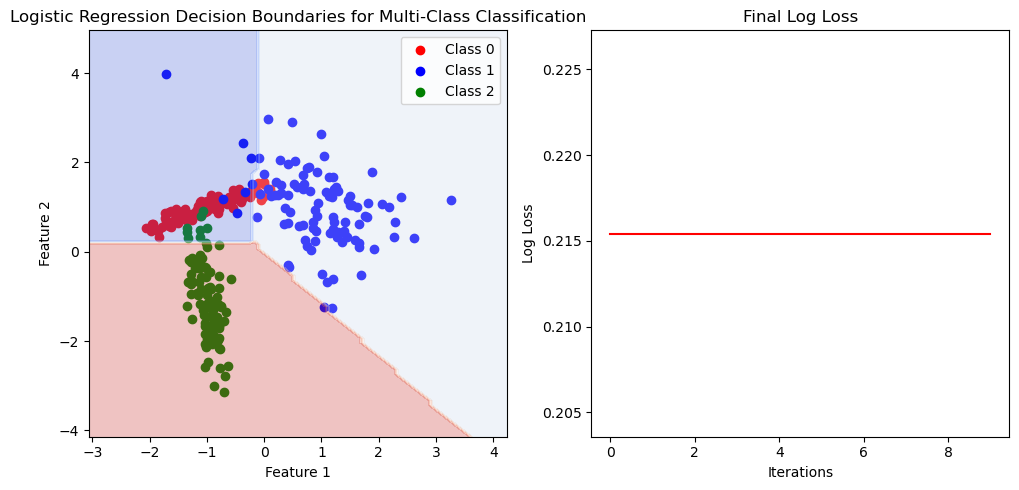

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
from sklearn.preprocessing import label_binarize

# Step 1: Generate synthetic data for multi-class classification
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=3, n_clusters_per_class=1, random_state=42)

# Step 2: Train logistic regression model for multi-class classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

# Step 3: Predictions and log loss calculation
y_prob = model.predict_proba(X)  # Probability of each class
y_binarized = label_binarize(y, classes=[0, 1, 2])  # Convert y to binary format for log loss calculation
loss = log_loss(y_binarized, y_prob)

# Print log loss
print(f"Log Loss: {loss}")

# Step 4: Visualize results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

# Scatter plot for the data points with different colors for each class
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], color=colors[i], label=f'Class {i}')

# Create a grid to evaluate the model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Logistic Regression Decision Boundaries for Multi-Class Classification")

# Plot final log loss (as scikit-learn does not provide log loss over iterations)
plt.subplot(1, 2, 2)
plt.plot([loss] * 10, 'r-')  # Simple line to represent final loss for illustration
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Final Log Loss")

plt.tight_layout()
plt.show()


# Multi-label classification

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Log Loss: 1.3117502550440447
Accuracy: 0.3


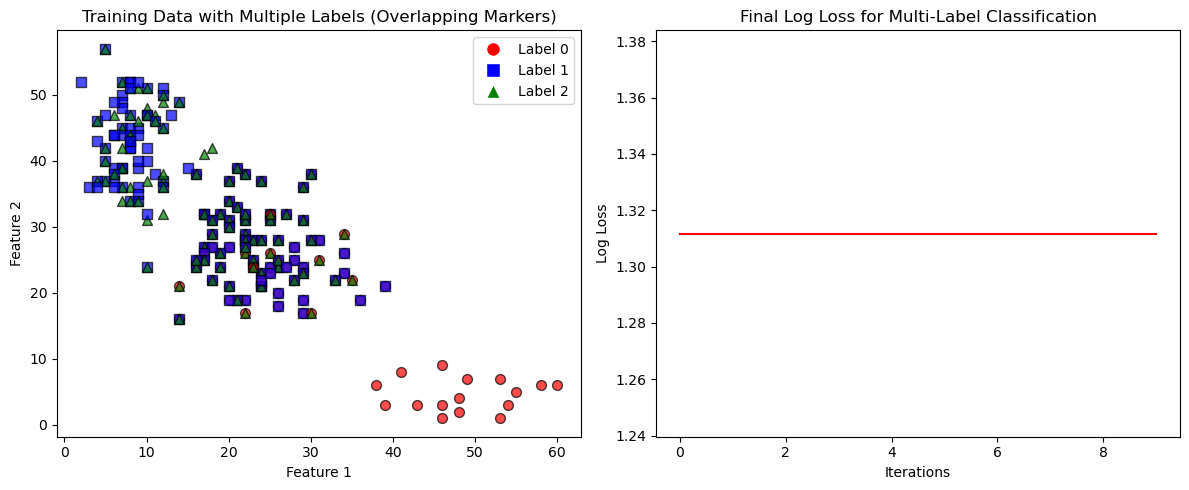

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data for multi-label classification
X, y = make_multilabel_classification(n_samples=300, n_features=2, n_classes=3, n_labels=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train logistic regression model for multi-label classification
# LogisticRegression with multi-label requires a separate model per label (One-vs-Rest)
models = []
for i in range(y_train.shape[1]):
    model = LogisticRegression()
    model.fit(X_train, y_train[:, i])
    models.append(model)

# Step 3: Predictions and log loss calculation for each label
y_prob = np.zeros(y_test.shape)
for i, model in enumerate(models):
    y_prob[:, i] = model.predict_proba(X_test)[:, 1]  # Probability of each label

# Calculate log loss and accuracy
loss = log_loss(y_test, y_prob)
accuracy = accuracy_score(y_test, (y_prob >= 0.5).astype(int))

# Print log loss and accuracy
print(f"Log Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Step 4: Visualize results with overlapping markers
plt.figure(figsize=(12, 5))

# Define colors and markers for each label
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']  # Different marker shapes for each label

# Plot training data with overlapping markers for multi-label samples
plt.subplot(1, 2, 1)
for i in range(y_train.shape[0]):
    for j in range(y_train.shape[1]):
        if y_train[i, j] == 1:
            plt.scatter(X_train[i, 0], X_train[i, 1], color=colors[j], marker=markers[j], edgecolor='k', s=50, alpha=0.7)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Training Data with Multiple Labels (Overlapping Markers)")
plt.legend(handles=[plt.Line2D([0], [0], marker=markers[i], color='w', markerfacecolor=colors[i], markersize=10, label=f'Label {i}') for i in range(y_train.shape[1])])

# Plot log loss over iterations (illustrative placeholder as sklearn doesn't expose it)
plt.subplot(1, 2, 2)
plt.plot([loss] * 10, 'r-')  # Simple line to represent final loss for illustration
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Final Log Loss for Multi-Label Classification")

plt.tight_layout()
plt.show()
